# ds-challenge-05_seattle-ds-career-040119

## Plotting Attendance

### 0. Getting Started

Start by forking this repo and cloning your fork to your computer.

### 1. Business Understanding

You want to understand when your cohort typically arrives on campus.

### 2. Data Understanding

Each of you has access to an attendance spreadsheet that now contains five days of arrival times for you and your colleagues.

### 3. Data Preparation

#### 3(a) Load the data

* Create a Jupyter Notebook.

* Load the arrival time data into Pandas from `data.csv`. 

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load arrival times dataset
arrivals = pd.read_csv('data.csv')
arrivals.head()

,8:56 AM,9:00 AM,7:45 AM,7:45 AM.1,8:05 AM,7:45 AM.2
0,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
1,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
2,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
3,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
4,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM


No headers. Need to not skip the first row.

In [4]:
pd.read_csv?

In [25]:
# Load arrival times dataset
arrivals = pd.read_csv('data.csv'
                      ,header = None)
arrivals.head()

,0,1,2,3,4,5
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM


In [26]:
#Manually make some column names :P
cols = ['day_001','day_002','day_003','day_004','day_005','day_006']
arrivals.columns = cols
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
day_001    23 non-null object
day_002    23 non-null object
day_003    23 non-null object
day_004    23 non-null object
day_005    23 non-null object
day_006    23 non-null object
dtypes: object(6)
memory usage: 1.2+ KB


In [27]:
# I know the dataset is small, so I'm just going to look at all the rows :)
arrivals

,day_001,day_002,day_003,day_004,day_005,day_006
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
5,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM
6,8:45 AM,8:54 AM,8:38 AM,8:40 AM,8:32 AM,8:41 AM
7,absent,11:00 AM,8:35 AM,8:15 AM,8:10 AM,8:10 AM
8,8:39 AM,8:13 AM,8:15 AM,8:12 AM,8:10 AM,8:00 AM
9,9:00 AM,8:50 AM,8:50 AM,8:50 AM,8:40 AM,8:45 AM


---

* Decide how to deal with any missing values in the data.

---

I see that there is one '`absent`', let's try to coerce all the columns to dates!

We did this last week, let me dig up some example code:
```python
pd.to_datetime(sales_data_wm['DocumentDate'])
```
Ok, let's try to `apply` to all the columns.

In [28]:
arrivals_clean = arrivals.applymap(pd.to_datetime, errors = 'coerce')

TypeError: applymap() got an unexpected keyword argument 'errors'

Hmmm, I'll just brute-force apply column by column.

Actually I don't have too because I have a list with all the column names, `cols`!

In [29]:
arrivals = arrivals.loc[:,cols].apply( pd.to_datetime, errors = 'coerce')

In [30]:
arrivals

,day_001,day_002,day_003,day_004,day_005,day_006
0,2019-04-08 08:56:00,2019-04-08 09:00:00,2019-04-08 07:45:00,2019-04-08 07:45:00,2019-04-08 08:05:00,2019-04-08 07:45:00
1,2019-04-08 08:40:00,2019-04-08 08:40:00,2019-04-08 08:30:00,2019-04-08 08:30:00,2019-04-08 08:45:00,2019-04-08 08:20:00
2,2019-04-08 08:45:00,2019-04-08 08:20:00,2019-04-08 08:05:00,2019-04-08 08:00:00,2019-04-08 08:05:00,2019-04-08 08:00:00
3,2019-04-08 08:40:00,2019-04-08 08:40:00,2019-04-08 08:40:00,2019-04-08 08:25:00,2019-04-08 08:40:00,2019-04-08 08:40:00
4,2019-04-08 08:55:00,2019-04-08 08:50:00,2019-04-08 08:55:00,2019-04-08 08:10:00,2019-04-08 08:15:00,2019-04-08 08:05:00
5,2019-04-08 08:45:00,2019-04-08 08:45:00,2019-04-08 08:45:00,2019-04-08 08:40:00,2019-04-08 08:30:00,2019-04-08 08:40:00
6,2019-04-08 08:45:00,2019-04-08 08:54:00,2019-04-08 08:38:00,2019-04-08 08:40:00,2019-04-08 08:32:00,2019-04-08 08:41:00
7,NaT,2019-04-08 11:00:00,2019-04-08 08:35:00,2019-04-08 08:15:00,2019-04-08 08:10:00,2019-04-08 08:10:00
8,2019-04-08 08:39:00,2019-04-08 08:13:00,2019-04-08 08:15:00,2019-04-08 08:12:00,2019-04-08 08:10:00,2019-04-08 08:00:00
9,2019-04-08 09:00:00,2019-04-08 08:50:00,2019-04-08 08:50:00,2019-04-08 08:50:00,2019-04-08 08:40:00,2019-04-08 08:45:00


Nice.

---

#### 3(b) Visualize the data

* Create some visualizations of the attendance data. Note that it can be grouped by day or aggregated together.

* At least one of your visualizations _must_ be a histogram.

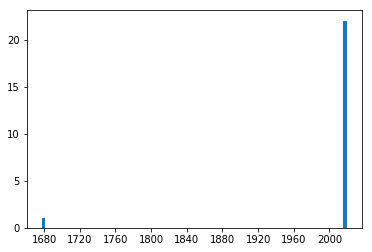

In [35]:
fig, ax = plt.subplots()

_ = ax.hist(arrivals['day_001'], bins = 100)

Well that was not great. I think the `NaT` is causing issues, let's look at a day without that row.

Let's try without that row, and then

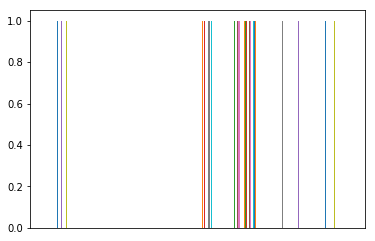

In [52]:
day_001_use = arrivals.loc[~arrivals['day_001'].isna(),['day_001']]

fig,ax = plt.subplots()

_ = ax.hist(day_001_use)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H %M'))
plt.show()


In [49]:
import matplotlib.dates as mdates

How about I just strip out the time of Day 1 and play with that?

In [56]:
# Get timestamp as string from Day 1
arrivals['day_001_ts_str'] = arrivals['day_001'].dt.strftime('%H %M')
arrivals['day_001_ts_str'].value_counts()

08 45    11
08 15     3
08 40     3
08 56     1
08 50     1
08 39     1
NaT       1
09 00     1
08 55     1
Name: day_001_ts_str, dtype: int64

Good enough for now.

In [58]:
day_001_use = arrivals['day_001_ts_str'].loc[arrivals['day_001_ts_str'] != 'NaT']
day_001_use.value_counts()

08 45    11
08 15     3
08 40     3
08 56     1
08 50     1
08 39     1
09 00     1
08 55     1
Name: day_001_ts_str, dtype: int64

([array([1., 0.]),
  array([1., 0.]),
  array([1., 0.]),
  array([1., 0.]),
  array([1., 0.]),
  array([1., 0.]),
  array([1., 0.]),
  array([0., 1.]),
  array([0., 1.]),
  array([1., 0.]),
  array([0., 1.]),
  array([1., 0.]),
  array([1., 0.]),
  array([1., 0.]),
  array([0., 1.]),
  array([1., 0.]),
  array([1., 0.]),
  array([0., 1.]),
  array([0., 1.]),
  array([1., 0.]),
  array([1., 0.]),
  array([1., 0.])],
 array([0. , 3.5, 7. ]),
 <a list of 22 Lists of Patches objects>)

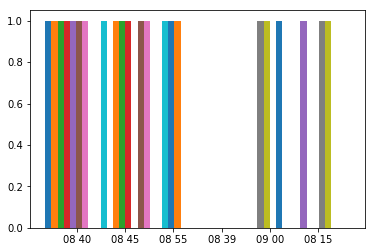

In [61]:
fig, ax = plt.subplots()

ax.hist(day_001_use,bins=2)

ok, well let's just use bar chart.

In [80]:
day_001_smry = pd.DataFrame(day_001_use.value_counts(), index = None)
day_001_smry.reset_index()

,index,day_001_ts_str
0,08 45,11
1,08 15,3
2,08 40,3
3,08 56,1
4,08 50,1
5,08 39,1
6,09 00,1
7,08 55,1


In [81]:
day_001_smry.columns = ['time_str','num_arrivals']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

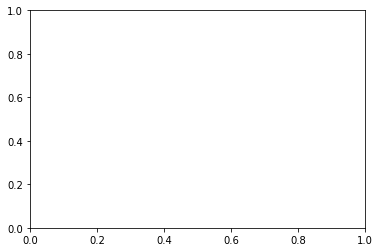

In [69]:
fig, ax = plt.subplots()

ax.bars(x = day_001_smry.index
       ,y = day_001_smry.)